In [13]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [14]:
root = '/Volumes/JUPITER/'
os.chdir(root)

#SCFMC3 LEADS 4+5

Leads 4 and 5 are the purple leads on the top sample. The leads are all ~40nm of Pd. This sample was made to test the connectivity of the leads to the nanotube using room temperature MIBK/IPA development and a metal known to make good nanotube contacts (Pd).

In [8]:
image_dir = 'nghLab/Data/scfmc3/Images/'
display(Image(image_dir+'scfmc3_q1.PNG', width=600, height=600))

OSError: [Errno 2] No such file or directory: 'Data/scfmc3/figures/'

All of my file names will refer to what leads were connected. The general naming scheme is something like...

*measurement_high_low-gate_number.filetype*

High, low, and gate refer to the pins where the high and low bias voltage and gate voltage are connected.

This sample was mounted in the dunker.

## Room Temp DATA

In [3]:
data_dir = 'Data/scfmc3/room_temp/'
os.listdir(data_dir)

['gateswp_16-17_20_a.bin',
 'gateswp_16-17_20_a.txt',
 'gateswp_16-17_20_b.bin',
 'gateswp_16-17_20_b.txt',
 'gateswp_16-17_20_c.bin',
 'gateswp_16-17_20_c.txt',
 'gateswp_4-5_20_c.bin',
 'gateswp_4-5_20_c.txt']

### Gate Dependence

The measured current as a funciton of gate voltage at fixed bias. This data was taken on leads 14-11.

In [4]:
import glob

In [5]:
filelist = glob.glob(data_dir+'*.bin')

In [6]:
filelist

['Data/scfmc3/room_temp/gateswp_16-17_20_a.bin',
 'Data/scfmc3/room_temp/gateswp_16-17_20_b.bin',
 'Data/scfmc3/room_temp/gateswp_16-17_20_c.bin',
 'Data/scfmc3/room_temp/gateswp_4-5_20_c.bin']

In [7]:
f = data_dir+'gateswp_4-5_20_c.bin'

In [8]:
rtgate = lvdt.get_data_2d(f)

In [9]:
#rtgroup = rtgate.groupby('Gate').mean()
#rtroll = pd.rolling_mean(rtgate, 3, axis=1)

In [10]:
rtroll = pd.rolling_mean(rtgate, 2, axis=0)

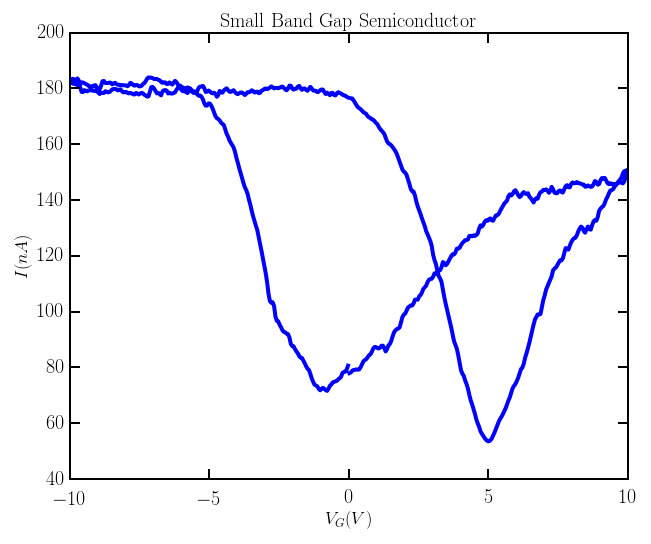

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax.scatter(rtgate['Gate'], rtgate['Iavg']*1e9, s = 5)
ax.plot(rtroll['Gate'], rtroll['Iavg']*1e9)
ax.set_title('Small Band Gap Semiconductor')
ax.set_xlim(-10, 10)
ax.set_xlabel('$V_G (V)$')
ax.set_ylabel('$I (nA)$')
# fig.savefig(data_dir+'RT_gateswp'+'.png', dpi=200)

## COOLDOWN

In [15]:
data_dir = 'Data/scfmc3/'

In [16]:
filelist = glob.glob(data_dir+'*.bin')

In [17]:
for i, f in enumerate(filelist):
    print i, f

0 Data/scfmc3/cool-down_4-5-6_a.bin
1 Data/scfmc3/cool-down_4-5-6_b.bin


In [18]:
partone = lvdt.get_data_2d(data_dir+'cool-down_4-5-6_a.bin')
parttwo = lvdt.get_data_2d(data_dir+'cool-down_4-5-6_b.bin')

In [19]:
cooldown = pd.concat([partone[partone['T'] > 12.5], parttwo[parttwo['T'] < 8.5]]).sort('T', ascending=0)

In [20]:
coolroll = pd.rolling_mean(cooldown, 10, axis=0)
coolroll.head()

,Size,T,Iavg,Istd,t0,dt
3,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN


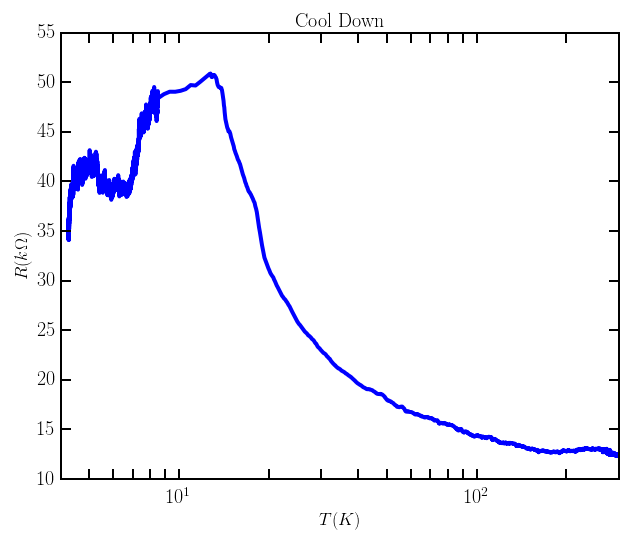

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# ax.scatter(cooldown['T'], cooldown['Iavg']*1e9, s = 1)
ax.plot(coolroll['T'], 1e-6/coolroll['Iavg'])
ax.set_xscale('log')
ax.set_xlim(4,300)
ax.set_title('Cool Down')
ax.set_xlabel('$T (K)$')
ax.set_ylabel('$R (k\Omega)$')
# fig.savefig(data_dir+'cooldown'+'.png', dpi=200)

## 4K DATA

### Gate Dependence

In [21]:
data_dir = 'nghLab/Data/scfmc3/4K/'

In [22]:
print glob.glob(data_dir+'*.bin')

['nghLab/Data/scfmc3/4K/gateswp_7-9_6_c.bin', 'nghLab/Data/scfmc3/4K/gateswp_4-5_6_a.bin', 'nghLab/Data/scfmc3/4K/vi-gate_4-5_6_a.bin', 'nghLab/Data/scfmc3/4K/gateswp_7-9_6_a.bin', 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_c.bin', 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_b.bin', 'nghLab/Data/scfmc3/4K/gateswp_7-9_6_b.bin', 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_a.bin']


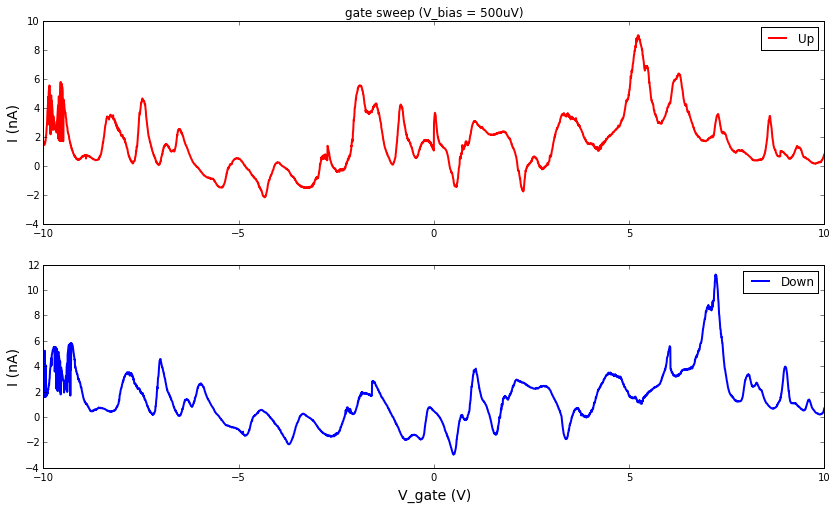

In [26]:
f = data_dir+'gateswp_4-5_6_a.bin'

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', lw = 2, label = 'Up')
ax1.set_xlim(-10,10)
ax1.set_title('gate sweep (V_bias = 500uV)')
ax1.set_ylabel('I (nA)', fontsize=14)
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', lw= 2, label = 'Down')
ax2.set_xlabel('V_gate (V)', fontsize=14)
ax2.set_ylabel('I (nA)', fontsize=14)
ax2.legend()
fig.savefig(data_dir+'4K_gate_a'+'.png', dpi=200)

This is a definite improvement on my previous working samples. There is some hysteresis in the gate, but not a lot of random switching problems. This is due either to the lithography being cleaner, or switching to the Ithaco amplifier.

Leads 4 and 5 blew up at this point. Fuck. I need to be more careful in the winter.

#SCFMC3 LEADS 7+9

Leads 7 and 9 are the blue leads on the bottom sample. The leads are all ~40nm of Pd. This sample was made to test the connectivity of the leads to the nanotube using room temperature MIBK/IPA development and a metal known to make good nanotube contacts (Pd).

In [27]:
data_dir = 'nghLab/Data/scfmc3/4K/'

## 4K DATA

###Gate Dependence

In [28]:
data_dir = 'nghLab/Data/scfmc3/4K/'

In [29]:
glob.glob(data_dir+'*.bin')

['nghLab/Data/scfmc3/4K/gateswp_7-9_6_c.bin',
 'nghLab/Data/scfmc3/4K/gateswp_4-5_6_a.bin',
 'nghLab/Data/scfmc3/4K/vi-gate_4-5_6_a.bin',
 'nghLab/Data/scfmc3/4K/gateswp_7-9_6_a.bin',
 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_c.bin',
 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_b.bin',
 'nghLab/Data/scfmc3/4K/gateswp_7-9_6_b.bin',
 'nghLab/Data/scfmc3/4K/vi-gate_7-9_6_a.bin']

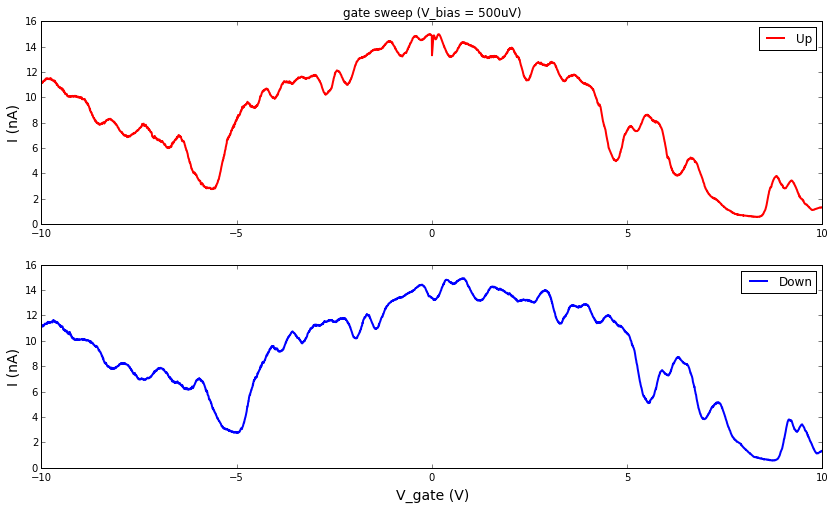

In [30]:
f = data_dir+'gateswp_7-9_6_b.bin'

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', lw = 2, label = 'Up')
ax1.set_xlim(-10,10)
ax1.set_title('gate sweep (V_bias = 500uV)')
ax1.set_ylabel('I (nA)', fontsize=14)
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', lw= 2, label = 'Down')
ax2.set_xlabel('V_gate (V)', fontsize=14)
ax2.set_ylabel('I (nA)', fontsize=14)
ax2.legend()
fig.savefig(data_dir+'4K_gate_b'+'.png', dpi=200)

This kind of looks like there will be some more coloumb blockade sort of behavior past 10V in the gate. I connected Atikur's gate amplifier to check it out. I should be able to go to +-20V now.

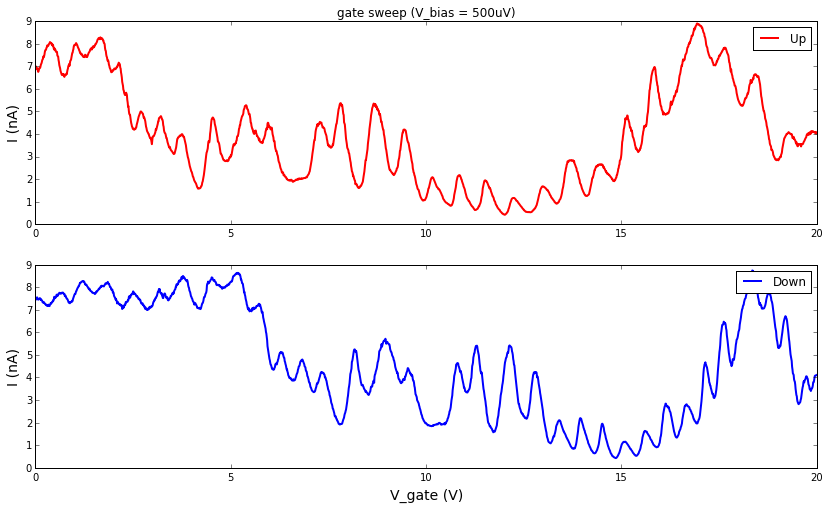

In [31]:
f = data_dir+'gateswp_7-9_6_c.bin'

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', lw = 2, label = 'Up')
ax1.set_xlim(0,20)
ax1.set_title('gate sweep (V_bias = 500uV)')
ax1.set_ylabel('I (nA)', fontsize=14)
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', lw= 2, label = 'Down')
ax2.set_xlabel('V_gate (V)', fontsize=14)
ax2.set_ylabel('I (nA)', fontsize=14)
ax2.legend()
fig.savefig(data_dir+'4K_gate_c'+'.png', dpi=200)

Cool. 

### Bias/Gate Sweep

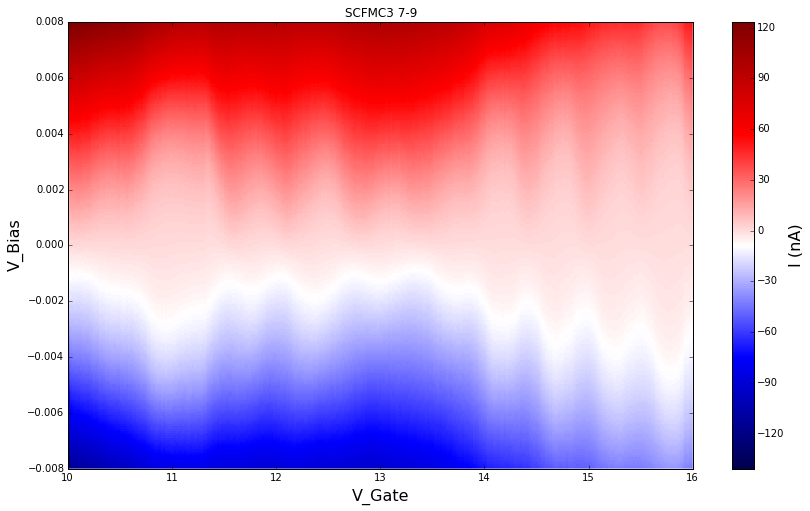

In [32]:
f = data_dir + 'vi-gate_7-9_6_c.bin'

vigate = lvdt.get_data_3d(f)
vigate = vigate.groupby(vigate.index).mean()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic,
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('SCFMC3 7-9')
ax.set_xlabel('V_Gate', fontsize=16)
ax.set_ylabel('V_Bias', fontsize=16)
cb = plt.colorbar(im)
cb.set_label('I (nA)', fontsize=16)
fig.savefig(data_dir+'4K_vi-gate_c'+'.png', dpi=200)

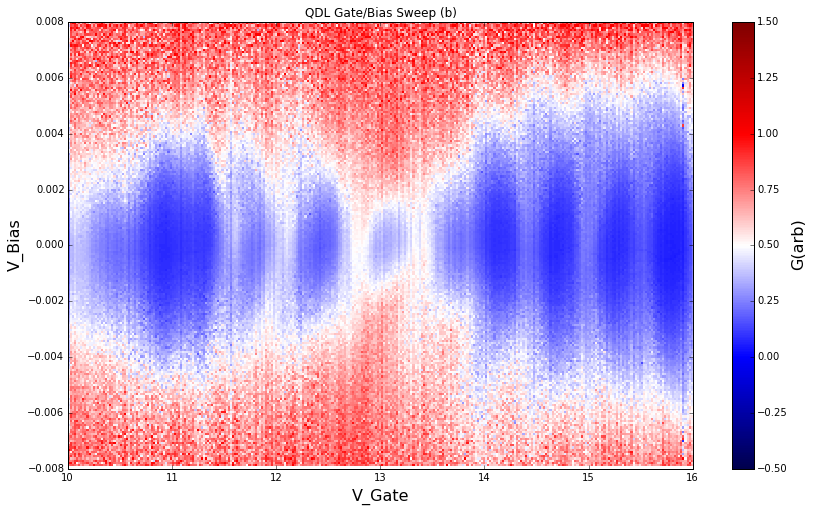

In [33]:
didv = vigate.diff()
didv = didv/didv.max()

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(didv)
im = ax.imshow(didv, extent = limits, 
           cmap = plt.cm.seismic, vmin = -0.5, vmax = 1.5, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('QDL Gate/Bias Sweep (b)')
ax.set_xlabel('V_Gate', fontsize=16)
ax.set_ylabel('V_Bias', fontsize=16)
cb = plt.colorbar(im)
cb.set_label('G(arb)', fontsize=16)
fig.savefig(data_dir+'4K_dvdi-gate_c'+'.png', dpi=200)

Not bad. Looks about right.